In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import scipy.interpolate
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from spectral import *
def diff(a, b):
    return 2*np.linalg.norm(a - b)/np.linalg.norm(a + b)

## Basic stuff

In [2]:
mesh_x = Multidomain(Legendre(10), (2, 4, 5, 8))
mesh_y = Multidomain(Legendre(6), (1, 3, 4))
mesh = mesh_x*mesh_y
u = TensorField(mesh, np.random.randn(*mesh.shape))

In [3]:
print(diff(u.func, u().func))
print(diff(u.func, u(None).func))
print(diff(u.func, u(None, None).func))

0.0
0.0
0.0


In [4]:
mesh2_x = Multidomain(Legendre(31), (2, 4, 5, 8))
mesh2_y = Multidomain(Legendre(7), (1, 3, 4))
mesh2 = mesh2_x*mesh2_y
u2 = u.remesh(mesh2)
X2, Y2 = mesh2.grid()
diff(u2.remesh(mesh).func, u.func)

2.2060546607164e-15

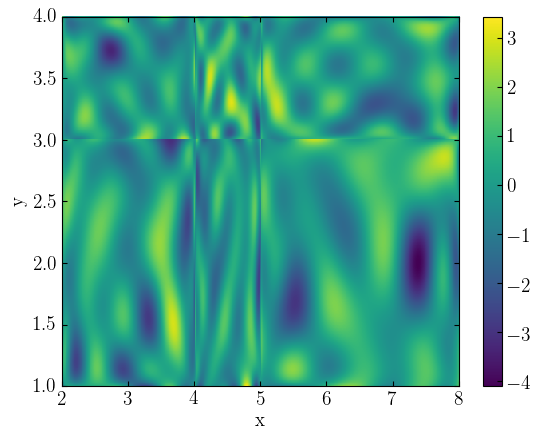

In [5]:
x = np.linspace(*mesh_x.endpoints, 500)
y = np.linspace(*mesh_y.endpoints, 500)
heatmap(x, y, u(x, y))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [10]:
u2 = u.match_domains()
X, Y = mesh.grid()
diff(u2(X, Y), u2.func)

2.8329619841217586e-15

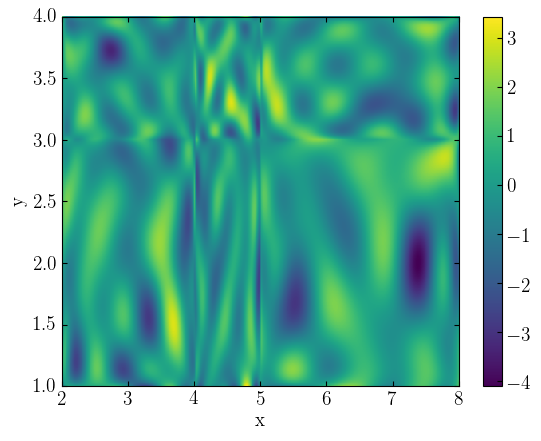

In [11]:
x = np.linspace(*mesh_x.endpoints, 500)
y = np.linspace(*mesh_y.endpoints, 500)
heatmap(x, y, u2(x, y))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

## Differentiate

In [6]:
x = np.linspace(*mesh_x.endpoints, 500)
y = np.linspace(*mesh_y.endpoints, 500)

du_dx = u.diff(0)
du_dy = u.diff(1)

dx_num, dy_num = np.gradient(u(x, y), x, y, edge_order=2)

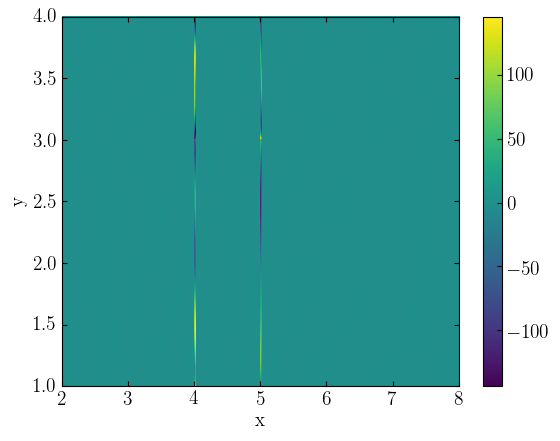

In [7]:
heatmap(x, y, du_dx(x, y) - dx_num)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

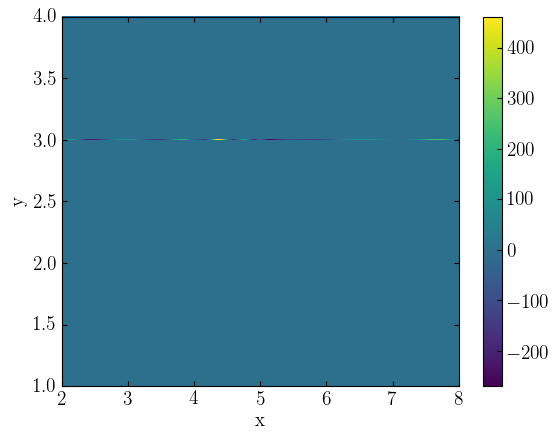

In [8]:
heatmap(x, y, du_dy(x, y) - dy_num)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [9]:
diff(u.grad().div().func, u.laplacian().func)

1.128643421719755e-16

## Integrate

In [10]:
x = np.linspace(*mesh_x.endpoints, 3000)
y = np.linspace(*mesh_y.endpoints, 3000)

int_x = np.trapz(u(x, y), x, axis=0)
int_y = np.trapz(u(x, y).T, y, axis=0)
int_xy = np.trapz(int_x, y, axis=0)
diff(u.int(), int_xy)

0.00015003271698344514

In [11]:
diff(u.int(0)(y), int_x)

0.00039481663708109625

In [12]:
diff(u.int(1)(x), int_y)

0.0002823307556912296

## Trace and transpose

In [13]:
u2 = TensorField(mesh, np.random.randn(2, 3, 4, *mesh.shape))
diff(u2.trace().func, u2.func.trace())

0.0

In [14]:
diff(u2.T(6, 2), u2(6, 2).T)

0.0

In [15]:
diff(u2.T.func, u2.func.transpose(2, 1, 0, 3, 4))

0.0

## Matmul

In [16]:
X, Y = mesh.grid()
x = X[5]
y = Y[5]

In [17]:
u1 = TensorField(mesh, np.random.randn(2, 3, 4, *mesh.shape))
u2 = TensorField(mesh, np.random.randn(4, *mesh.shape))
diff((u1@u2)(x, y), u1(x, y)@u2(x, y))

5.720580654093656e-16

In [18]:
u1 = TensorField(mesh, np.random.randn(2, 3, 4, *mesh.shape))
u2 = TensorField(mesh, np.random.randn(2, 4, 7, *mesh.shape))
diff((u1@u2)(x, y), u1(x, y)@u2(x, y))

1.2997565420678347e-15

## Determinant and cofactor matrix

In [19]:
u1 = TensorField(mesh, np.random.randn(3, 3, 4, *mesh.shape))
det = u1.det()
diff(det.func, np.linalg.det(u1.func.T).T)

1.9681194524840486e-16

In [20]:
u1 = TensorField(mesh, np.random.randn(3, 3, 4, *mesh.shape))
det = u1.det()
eyedet = np.eye(3)*det[:,None,None]
cf = u1.cofactor_matrix()
diff((cf.T@u1.T.transpose((0,2,1))).func, eyedet.func)

2.4694581526880373e-16

In [21]:
for n in range(1, 5):
    u1 = TensorField(mesh, np.random.randn(n, n, *mesh.shape))
    det = u1.det()
    eyedet = np.eye(n)*det
    cf = u1.cofactor_matrix()
    print(diff((cf.T@u1).func, eyedet.func))

3.515888824455763e-17
1.4308533422514697e-16
2.438894608492611e-16
3.6555761686820106e-16
